In [3]:
import os

os.chdir("/home/u1025/2020_text_mining")

In [4]:
from job_answer_preprocess import preprocess_answer # 전처리 함수 불러오기
from konlpy.tag import Hannanum
from wordcloud import WordCloud
from collections import Counter
from re import match
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv("/home/u1025/2020_text_mining/jobkorea_all.csv")

In [8]:
data = preprocess_answer(data)

In [9]:
hannanum = Hannanum()

In [10]:
%time hannanum_nouns = hannanum.nouns(''.join(str(data['답변'].fillna(''))))
hannanum_nouns[-10:]

CPU times: user 1.61 s, sys: 42.8 ms, total: 1.66 s
Wall time: 380 ms


['일개미형', '조사', '전공과목', '중', '소비자', '행동분석', '사교육', '마케팅', '답변', '25574']

In [17]:
DBA = data.loc[data['직무분야'] == "DBA·데이터베이스", "답변"]
nouns = hannanum.nouns(''.join(str(DBA.fillna(''))))
nouns = [n for n in nouns if len(n) > 1]
nouns = [n for n in nouns if not(match('^[0-9]',n))]
count = Counter(nouns)
top = count.most_common(40)# 그 여기가 이슈 3에서 다루는 부분

In [18]:
my_font_path = "C:/Users/User/OneDrive/바탕 화면/NanumFontSetup_TTF_GOTHIC/NanumGothicBold.ttf"

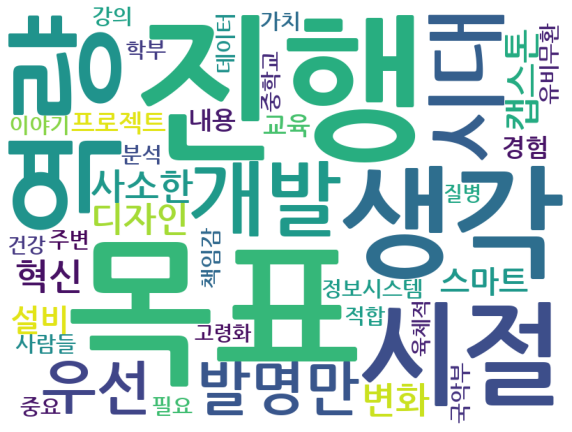

In [23]:
wordcloud = WordCloud(font_path=my_font_path, 
                   background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(top))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)